# California Housing 

load modules and dataset

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [75]:
from sklearn import datasets

dataset_housing = datasets.fetch_california_housing()
df = pd.DataFrame(dataset_housing.data, columns=dataset_housing.feature_names)
df["target"] = dataset_housing.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [76]:
print(dataset_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

---

#### define X and y

In [77]:
X = df.iloc[:, :-1]
y = df["target"]

#### Data Preprocessing
- null data or outliers?
- Multicollinearity
- train test split
- scaling

you do not need to process every step. Do if you think it is necessary

In [78]:
df = df.drop("AveBedrms", axis=1, errors="ignore")
df

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32,0.847


In [79]:
df.describe().round(2)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,target
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,35682.00,1243.33,41.95,-114.31,5.00


In [80]:
a = df["AveRooms"]
print(a.quantile(q=0.01))
print(a.quantile(q=0.05))
print(a.quantile(q=0.95))
print(a.quantile(q=0.99))  # mask here
print(a.quantile(q=0.999))

2.581133407821229
3.4323300062383035
7.640246547450425
10.357033023735815
34.19969808542019


In [81]:
a = df["Population"]
print(a.quantile(q=0.01))
print(a.quantile(q=0.05))
print(a.quantile(q=0.95))  # mask here
print(a.quantile(q=0.99))
print(a.quantile(q=0.999))

88.0
348.0
3288.0
5805.830000000002
10372.681000000095


In [82]:
a = df["AveOccup"]
print(a.quantile(q=0.01))
print(a.quantile(q=0.05))
print(a.quantile(q=0.95))
print(a.quantile(q=0.99))  # mask here
print(a.quantile(q=0.999))

1.5366864723576525
1.872544757033248
4.333416666666666
5.394812032520327
13.630443486590115


In [83]:
dfraw = df.copy()

In [84]:
a = df["AveOccup"]
df = df[a < a.quantile(0.99)]

a = df["Population"]
df = df[a < a.quantile(0.95)]

a = df["AveRooms"]
df = df[a < a.quantile(0.99)]

In [85]:
df.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,target
count,19212.000000,19212.000000,19212.000000,19212.000000,19212.000000,19212.000000,19212.000000,19212.000000
mean,3.865211,29.351551,5.287075,1246.224964,2.880647,35.649075,-119.604743,2.077523
std,1.900744,12.406220,1.228501,654.834420,0.692974,2.139289,2.007455,1.166258
min,0.499900,1.000000,0.846154,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.557475,19.000000,4.446320,776.000000,2.419626,33.930000,-121.830000,1.185000
50%,3.529600,30.000000,5.217313,1132.000000,2.802943,34.270000,-118.520000,1.808500
75%,4.738100,38.000000,6.013498,1613.000000,3.253644,37.720000,-118.030000,2.669000
max,15.000100,52.000000,10.447853,3262.000000,5.392954,41.950000,-114.550000,5.000010


In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: >

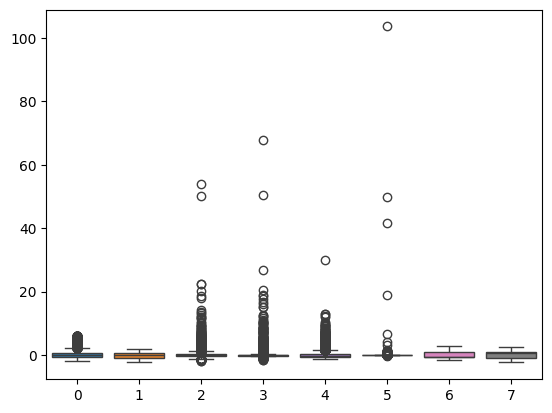

In [88]:
sns.boxplot(X_train_scaled)

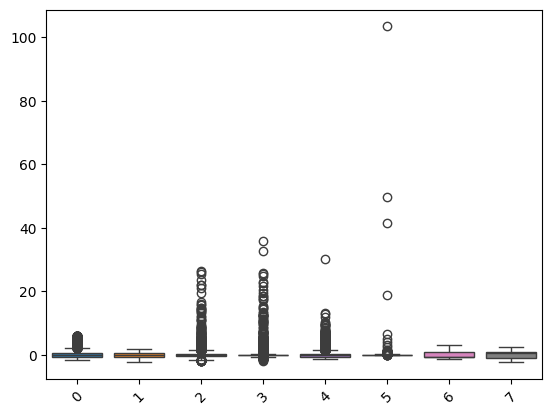

In [ ]:
# your code

In [ ]:
# your code to get mse

0.5134842415113084

In [ ]:
# your code get R2

0.604532936296875